# [Avaliação 01](A01_-_Documento.pdf) - Diodos (28/07)

Esta avaliação tem como objetivo o estudo referente à modelagem matemática das propriedades de operação de um Diodo. 

**Desenvolvedores:**

- *André Vitor Cadena de Oliveira*
- *Lorenzo Carrera de Oliveira* 
- *Mateus Pincho de Oliveira* 

---

## Montagem 🛠️

**Lista de Componentes:**
- Fonte de tensão de $12V$;
- Resistor de resistência $R\in \{220, 470, 1k, 2.2k, 4.7k, 10k, 47k, 100k\} \ \Omega$;
- Diodo 1N4148;

**Esquemático:**
<p align="center">
<img src="https://github.com/loolirer/Dispositivos-Eletronicos/blob/main/Avaliações/1°%20Estágio/Avaliação%201/Imagens/E01.jpg?raw=true" height="250" align="center">
</p>

**Observações:**
- O modelo do diodo escolhido na simulação precisa ter propriedades similares ao do selecionado;

---

## Funcionamento ⚙️

Para a demonstração do funcionamento do circuito, será utilizada a plataforma *LTspice* para realizar sua simulação e coleta de dados referente às condições propostas.

**Procedimentos:**
1. Ao abrir o LTspice, acesse o painel de controle no canto superior esquerdo e começar um novo esquemático;
2. Adicione a fonte de tensão contínua ao selecioná-la no menu acessado pela tecla F2;
3. Posicione um resistor comum e um diodo, ambos componentes disponíveis na barra de ferramentas superior da plataforma;
4. Defina os valores específicos de cada componente, a fonte de 12 V, as multiplas resistências pedidas, e o diodo 1N4148;
5. Aperte o botão "run" para realizar a simulação e selecionar um tempo especifico para a análise dos dados (usualmente um valor pequeno);
6. Selecione os pontos cujos valores serão medidos, um nó para a medição de uma voltagem e um componente para a medição da corrente que passa por ele;
7. O passos de definição de valores e medição são repetidos para os multiplos resistores a serem avaliados de maneira a obter todos os dados necesários.
   
---

## Análise e Explicações 🔎 

**Quesitos Propostos:**

- Preencher uma tabela com os valores de tensão $(V_D)$ e corrente $(I_D)$ no diodo para cada valor de resistência $R$;
- Construir o gráfico de sua curva característica, $V_D \times I_D$, do diodo e checar se a forma está satisfatória;
- Determinar os valores da corrente de saturação reversa $I_s$ e do $\eta$ do diodo utilizando o método dos Mínimos Quadrados e checar se são satisfatórios;
- Determinar matemáticamente a expressão que modela a curva característica desse diodo;

---

In [83]:
# Importando módulos...
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

### Tabela de relação $R$ , $V_D$ e $I_D$

| $R \ (\Omega)$ | 220   | 470   | 1k   | 2.2k | 4.7k  | 10k  | 47k  | 100k  |
|----------|-------|-------|------|------|-------|------|------|-------|
| $V_D$ (V)   | 0.79  | 0.74  | 0.70 | 0.66 | 0.63 | 0.59 | 0.52  | 0.47  |
| $I_D$ (mA)  | 50.94 | 23.95 | 11.3 | 5.15 | 2.04 | 1.14 | 0.24  | 0.11  |

### Gráfico $V_D \times I_D$

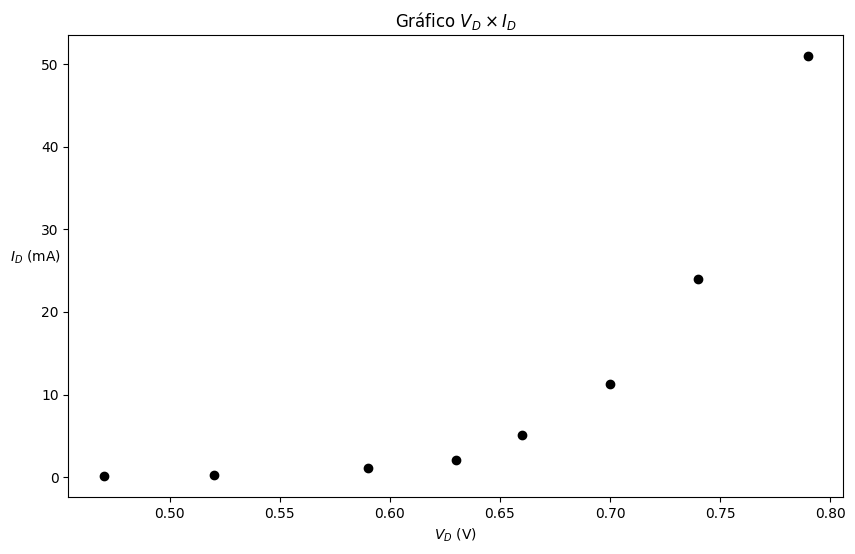

In [84]:
# Definindo espaço de plotagem
fig, ax = plt.subplots(figsize=(10, 6))

# Definindo título e opções de eixos
ax.set(title=r'Gráfico $V_D \times I_D$')
ax.set_xlabel(r'$V_D$ (V)',
              rotation=0)
ax.set_ylabel(r'$I_D$ (mA)',
              rotation=0)

# Grandezas a serem plotadas
df_V_D = np.array([0.79, 0.74, 0.70, 0.66, 0.63, 0.59, 0.52, 0.47])
df_I_D = np.array([50.94, 23.95, 11.3, 5.15, 2.04, 1.14, 0.24, 0.11]) 

# Plotando o dataframe coletado
ax.scatter(df_V_D,
           df_I_D,
           marker='o',
           color='k')

plt.show()

### Determinação do $I_s$ e $\eta$

Sabendo-se que a curva característica do Diodo é modelada por:

$I_D = I_s \cdot e^{\frac{V_D}{\eta \cdot V_t}}$

e que, previamente, sabe-se que os parâmetros a seguir pertencem a suas respectivas faixas:

- $I_s \approx 1\mu$ A ~ $1$ fA
- $\eta \approx 1$ ~ $4$
- $V_t \approx 25$ mV

É possível estimar esses parâmetros do Diodo 1N4148 via Método de Mínimos Quadrados.

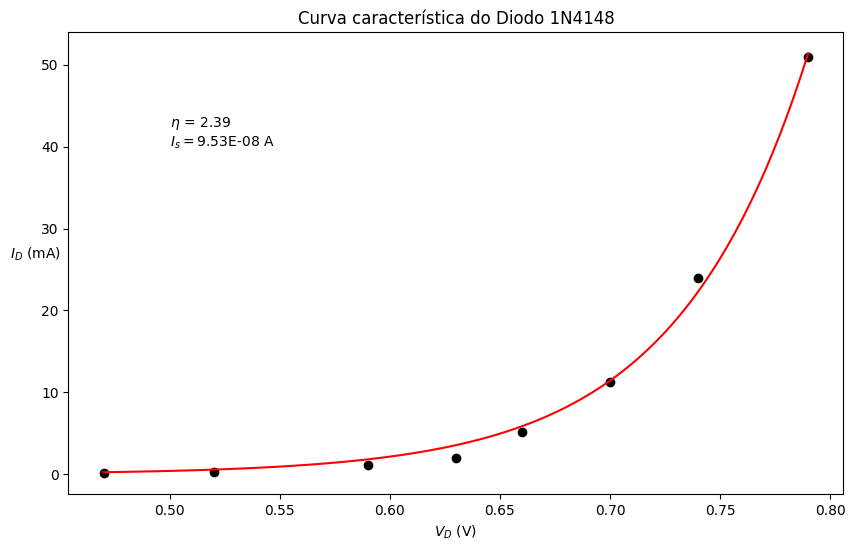

In [85]:
# Determinando função modelo

V_t = 25 * 1e-3 # Tensão térmica de 25 mV

def I_D(V_D, eta, I_s): # Função característica do Diodo
  return I_s * np.exp(V_D / (eta * V_t))

# Função 'curve_fit' retorna 2 listas; 
# Porém, só estamos interessados na que representa os parâmetros ajustados da função
parametros, _ = curve_fit(I_D, df_V_D, df_I_D, p0=[2, 1e-6]) 
# p0 é o ponto de partida dos argumentos
# Como se conhece uma estimativa de que:
# - eta = 1 ~ 4 
# - I_s = 1uA ~ 1fA
# são utilizados valores próximos a essas estimativas (2, 1e-6)

eta, I_s = parametros
curva_V_D = np.linspace(min(df_V_D), max(df_V_D), 100) # Gera 100 pontos igualmente espaçados dentro do intervalo de V_D
curva_I_D = [I_D(V_D, eta, I_s) for V_D in curva_V_D]  # Gera 100 valores I_D para cada V_D
# A ideia de utilizar muitos pontos é de produzir uma curva de aparência lisa

# Definindo espaço de plotagem
fig, ax = plt.subplots(figsize=(10, 6))

# Definindo título e opções de eixos
ax.set(title=r'Curva característica do Diodo 1N4148')
ax.set_xlabel(r'$V_D$ (V)',
              rotation=0)
ax.set_ylabel(r'$I_D$ (mA)',
              rotation=0)

# Plotando o dataframe coletado 
ax.scatter(df_V_D,
           df_I_D,
           marker='o',
           color='k')

# Plotando a curva aproximada
plt.plot(curva_V_D, 
         curva_I_D, 
         color='r')

# Observação: como I_s está em mA, é necessário converter sua representação para Ampéres
ax.text(0.5, 40, r'$\eta$ = ' + f'{eta:.2f}' + '\n' + r'$I_s = $' + f'{I_s * 1e-3 :.2E} A')

plt.show()

### Expressão da curva característica do 1N4148

Com os parâmetros $\eta$ e $I_s$ calculados, e assumindo $V_t = 25$ mV, conclui-se que a expressão da curva característica do Diodo 1N4148 é:

$I_D = 9.53 \cdot 10^{-8} \cdot e^{16.73 \cdot V_D}$

---